In [34]:
!pip3 install torchsummary

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0

## Input Tensor

In [36]:
# Hardwired Part
hardwired = torch.randn(1, 1, 33, 60, 40).to(device)

## 3D CNN Model for HAR
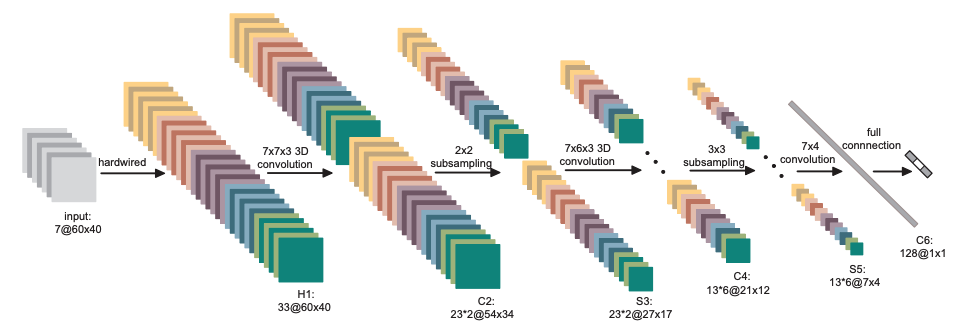

In [37]:
class Original_Model(nn.Module):
  def __init__(self):
    super(Original_Model, self).__init__()
    self.conv1 = nn.Conv3d(in_channels=1, out_channels=2, kernel_size=(3,7,7), stride=1)
    self.conv2 = nn.Conv3d(in_channels=2, out_channels=6, kernel_size=(3,7,6), stride=1)
    self.pool1 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(23*2, 3, bias=False)
    self.pool2 = nn.MaxPool2d(3)
    self.conv3 = nn.Conv2d(in_channels=13*6, out_channels=128, kernel_size=(7,4), stride=1)
    self.fc1 = nn.Linear(128, 3, bias=False)
    
  def forward(self, x):
    print("연산 전:\t\t", x.size())
    assert x.size()[2] == 33
    (x1, x2, x3, x4, x5) = torch.split(x, [6,6,7,7,7], dim=2)
    x1 = F.relu(self.conv1(x1))
    x2 = F.relu(self.conv1(x2))
    x3 = F.relu(self.conv1(x3))
    x4 = F.relu(self.conv1(x4))
    x5 = F.relu(self.conv1(x5))
    x = torch.cat([x1, x2, x3, x4, x5], dim=2)
    print("conv1 연산 후:\t", x.shape)
    x = x.view(x.shape[0], -1, x.shape[3], x.shape[4])
    x = self.pool1(x)
    x = x.view(-1, 2, 23, x.shape[2], x.shape[3])
    print("pool1 연산 후:\t", x.shape)
    (x1, x2, x3, x4, x5) = torch.split(x, [4,4,5,5,5], dim=2)
    x1 = F.relu(self.conv2(x1))
    x2 = F.relu(self.conv2(x2))
    x3 = F.relu(self.conv2(x3))
    x4 = F.relu(self.conv2(x4))
    x5 = F.relu(self.conv2(x5))
    x = torch.cat([x1, x2, x3, x4, x5], dim=2)
    print("conv2 연산 후:\t",x.shape)
    x = x.view(x.shape[0], -1, x.shape[3], x.shape[4])
    x = self.pool2(x)
    x = x.view(-1, 78, x.shape[2], x.shape[3])
    print("pool2 연산 후:\t", x.shape)
    x = F.relu(self.conv3(x))
    print("conv3 연산 후:\t", x.shape)
    x = x.view(-1, 128)
    x = F.relu(self.fc1(x))
    print("fc1 연산 후:\t", x.shape)
    return x
  

cnn = Original_Model().to(device)
# output = cnn(torch.randn(1, 1, 33, 60, 40).to(device))  # Input Size: (N, C_in, Dimension, Height, Width)
summary(cnn, (1,33,60,40))

연산 전:		 torch.Size([2, 1, 33, 60, 40])
conv1 연산 후:	 torch.Size([2, 2, 23, 54, 34])
pool1 연산 후:	 torch.Size([2, 2, 23, 27, 17])
conv2 연산 후:	 torch.Size([2, 6, 13, 21, 12])
pool2 연산 후:	 torch.Size([2, 78, 7, 4])
conv3 연산 후:	 torch.Size([2, 128, 1, 1])
fc1 연산 후:	 torch.Size([2, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1         [-1, 2, 4, 54, 34]             296
            Conv3d-2         [-1, 2, 4, 54, 34]             296
            Conv3d-3         [-1, 2, 5, 54, 34]             296
            Conv3d-4         [-1, 2, 5, 54, 34]             296
            Conv3d-5         [-1, 2, 5, 54, 34]             296
         MaxPool2d-6           [-1, 46, 27, 17]               0
            Conv3d-7         [-1, 6, 2, 21, 12]           1,518
            Conv3d-8         [-1, 6, 2, 21, 12]           1,518
            Conv3d-9         [-1, 6, 3, 21, 12]           1,518
           Conv